In [1]:
# library(devtools)
# install_github("bowang-lab/simATAC")

In [1]:
library(simATAC)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

In [2]:
library(rhdf5)
library(sets)
library(dplyr)
library(Matrix)

Registered S3 method overwritten by 'sets':
  method        from   
  print.element ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:sets’:

    %>%


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, un

In [3]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
set.seed(1234)

Warning message:
“replacing previous import ‘GenomicRanges::.__C__GenomicRanges_OR_GenomicRangesList’ by ‘rtracklayer::.__C__GenomicRanges_OR_GenomicRangesList’ when loading ‘BSgenome’”
No methods found in package ‘IRanges’ for request: ‘splitAsList’ when loading ‘ensembldb’

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'Seurat'


The following object is masked from 'package:SummarizedExperiment':

    Assays




In [4]:
library(SnapATAC)
library(tictoc)


Warning message:
"no DISPLAY variable so Tk is not available"


In [30]:
# install.packages("Signac")

In [6]:
# #library(devtools)
# install.packages("doSNOW")
# install.packages("plot3D")
# install_github("r3fang/SnapATAC")

## 既存のATACデータを分割simulation

In [11]:
getPeakByCell <- function(count, count.noise, peak.num = 5000){

  bin.mean <- rowSums(count.noise)/ ncol(count.noise)
  peak.index <- order(bin.mean, decreasing=TRUE)[1:peak.num]
  count.noise.peak <- as(count.noise[peak.index,], "dgCMatrix")
  count.peak <- as(count[peak.index,], "dgCMatrix")

  return(list(count.peak, count.noise.peak))
}


In [12]:
getBinByCell <- function(count.peak){

  count.bin <- count.peak
  count.bin[count.bin > 0] <- 1
  count.bin <- as(count.bin, "dgCMatrix")

  return(count.bin)
  
}

### Buenrostro2018

In [7]:
# Buenrostro

# Create cell by bin matrix from generated .h5 (snap) file.
b.x.sp = createSnap(
  file="/home/naoto/scOpen/simATAC/Buenrostro2018/Buenrostro2018.snap",
  sample="labels",
  do.par = TRUE,
  num.cores=1
)
b.x.sp = addBmatToSnap(b.x.sp, bin.size=5000)

# Read true cell labels with cell barcodes list.
metadata <- read.table('/home/naoto/scOpen/simATAC/Buenrostro2018/Buenrostro2018_metadata.tsv', header = TRUE)
label <- sapply(levels(b.x.sp@metaData$barcode),
              function(x) as.character(metadata[which(toupper(metadata$file) == x),]$label))
# label <- sapply(b.x.sp@barcode,
#               function(x) as.character(metadata[which(metadata$barcode == x),]$label))
b.x.sp@sample <- unlist(label)


# Remove unknown cell group.
index <- which(b.x.sp@sample != "UNK")
b.x.sp <- b.x.sp[index,]
# b.x.sp

# Define each cell group.
index1 <- which(b.x.sp@sample == "GMP")
b.x.sp1 <- b.x.sp[index1 ,]
# b.x.sp1
index2  <- which(b.x.sp@sample == "CMP")
b.x.sp2 <- b.x.sp[index2,]
# b.x.sp2
index3 <- which(b.x.sp@sample == "pDC")
b.x.sp3 <- b.x.sp[index3,]
# b.x.sp3
index4 <- which(b.x.sp@sample == "HSC")
b.x.sp4 <- b.x.sp[index4,]
# b.x.sp4
index5 <- which(b.x.sp@sample == "LMPP")
b.x.sp5 <- b.x.sp[index5,]
# b.x.sp5
index6 <- which(b.x.sp@sample == "MPP")
b.x.sp6 <- b.x.sp[index6,]
# b.x.sp6
index7 <- which(b.x.sp@sample == "mono")
b.x.sp7 <- b.x.sp[index7,]
# b.x.sp7
index8 <- which(b.x.sp@sample == "MEP")
b.x.sp8 <- b.x.sp[index8,]
# b.x.sp8
index9 <- which(b.x.sp@sample == "CLP")
b.x.sp9 <- b.x.sp[index9,]
# b.x.sp9

Epoch: reading the barcode session ...

Epoch: reading cell-bin count matrix session ...



In [8]:
b.x.sp

number of barcodes: 1974
number of bins: 627478
number of genes: 0
number of peaks: 0
number of motifs: 0

In [8]:
# install_github("collectivemedia/tictoc")

In [29]:

# This function gets a snap object (from SnapATAC package) containing a cell by bin matrix and
# simulates the same number of cells as given in the input, with specified input simulation parameters.
# Inputs:
# my.x.sp: An snap object containing cell by bin matrix in the bmat field.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# species: The species of the input data, to be used for naming the bins in the simulation.
# Output:
# sim: A SingleCellExperiment object containing simulated parametes, returned by simATAC simulator.
#
simulate <- function(my.x.sp, mean, sd, species){
  tic("Estimation time:")
  object <- simATAC::simATACEstimate(t(my.x.sp@bmat))
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_estimation_time.txt", append = TRUE)
  write(paste(as.character(nrow(my.x.sp@bmat)),
              simATACget(object, "lib.mean1"),
              simATACget(object, "lib.sd1"),
              simATACget(object, "lib.prob"),
              simATACget(object, "lib.mean2"),
              simATACget(object, "lib.sd2"),
              simATACget(object, "mean.coef0"),
              simATACget(object, "mean.coef1"),
              simATACget(object, "mean.coef2"), sep = "    "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_default_parameters.txt", append = TRUE)
  object <- simATAC::setParameters(object,
                          nCells = nrow(my.x.sp@bmat),
                          species = species,
                          noise.mean = 0,
                          noise.sd = 0)

  tic("Simulation time:")
  sim <- simATAC::simATACSimulate(object)
#   sim.noise = addGaussianNoise(object, sim, mean, sd)
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_simulation_time.txt", append = TRUE)

  return(sim)
}

In [30]:
simulateBuenrostro <- function(version, mean, sd){

  # Create a folder for saving simulated count matrix.
  dir.create(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", version, sep = ""))
  id = paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", version, "/Buenrostro2018", sep = "")
  gc()

  # Simulate each cell group with simATAC.
  sim3.1 <- simulate(b.x.sp1, mean, sd, species = "human")
#   sim3.1 <- sim3.1.data[[1]]
#   sim3.1.noise <- sim3.1.data[[2]]
  gc()
  sim3.2 <- simulate(b.x.sp2, mean, sd, species = "human")
#   sim3.2 <- sim3.2.data[[1]]
#   sim3.2.noise <- sim3.2.data[[2]]
  gc()
  sim3.3 <- simulate(b.x.sp3, mean, sd, species = "human")
#   sim3.3 <- sim3.3.data[[1]]
#   sim3.3.noise <- sim3.3.data[[2]]
  gc()
  sim3.4 <- simulate(b.x.sp4, mean, sd, species = "human")
#   sim3.4 <- sim3.4.data[[1]]
#   sim3.4.noise <- sim3.4.data[[2]]    
  gc()
  sim3.5 <- simulate(b.x.sp5, mean, sd, species = "human")
#   sim3.5 <- sim3.5.data[[1]]
#   sim3.5.noise <- sim3.5.data[[2]]
  gc()
  sim3.6 <- simulate(b.x.sp6, mean, sd, species = "human")
#   sim3.6 <- sim3.6.data[[1]]
#   sim3.6.noise <- sim3.6.data[[2]]
  gc()
  sim3.7 <- simulate(b.x.sp7, mean, sd, species = "human")
#   sim3.7 <- sim3.7.data[[1]]
#   sim3.7.noise <- sim3.7.data[[2]]
  gc()
  sim3.8 <- simulate(b.x.sp8, mean, sd, species = "human")
#   sim3.8 <- sim3.8.data[[1]]
#   sim3.8.noise <- sim3.8.data[[2]]
  gc()
  sim3.9 <- simulate(b.x.sp9, mean, sd, species = "human")
#   sim3.9 <- sim3.9.data[[1]]
#   sim3.9.noise <- sim3.9.data[[2]]
  gc()

  # Combine simulated cell groups together to save for further analysis (for performing cell type clustering analysis).
  data <- rbind(t(assays(sim3.1)$counts), t(assays(sim3.2)$counts), t(assays(sim3.3)$counts), t(assays(sim3.4)$counts),
                            t(assays(sim3.5)$counts), t(assays(sim3.6)$counts), t(assays(sim3.7)$counts), t(assays(sim3.8)$counts),
                            t(assays(sim3.9)$counts))
#   data.noise <- rbind(t(assays(sim3.1.noise)$counts), t(assays(sim3.2.noise)$counts), t(assays(sim3.3.noise)$counts), t(assays(sim3.4.noise)$counts),
#                             t(assays(sim3.5.noise)$counts), t(assays(sim3.6.noise)$counts), t(assays(sim3.7.noise)$counts), t(assays(sim3.8.noise)$counts),
#                             t(assays(sim3.9.noise)$counts))
  data <- as(data, "dgCMatrix")
    
#   data.noise <- as(data.noise, "dgCMatrix")
  label <- unlist(c(b.x.sp1@sample, b.x.sp2@sample, b.x.sp3@sample, b.x.sp4@sample,
                    b.x.sp5@sample, b.x.sp6@sample, b.x.sp7@sample, b.x.sp8@sample,
                    b.x.sp9@sample))
  gc()

  # Save simulated matrix with labels in a h5 file.

  if (file.exists(paste(id, "_sim_mat.h5", sep="")))
    #Delete file if it exists
    file.remove(paste(id, "_sim_mat.h5", sep=""))

  mat <- summary(data)
#   mat$noise = round(mat$x + rnorm(n=dim(mat)[1], mean = mean, sd = sd))
  h5createFile(paste(id, "_sim_mat.h5", sep=""))
  h5write(mat, paste(id, "_sim_mat.h5", sep=""), "sim")
  h5write(label, paste(id, "_sim_mat.h5", sep=""), "label")

#   if (file.exists(paste(id, "_sim_noise_mat.h5", sep="")))
#     #Delete file if it exists
#     file.remove(paste(id, "_sim_noise_mat.h5", sep=""))

#   mat.noise <- summary(data.noise)
#   h5createFile(paste(id, "_sim_noise_mat.h5", sep=""))
#   h5write(mat.noise, paste(id, "_sim_noise_mat.h5", sep=""), "sim")
#   h5write(label, paste(id, "_sim_noise_mat.h5", sep=""), "label")
    
  return(list(id, mat))
}

In [31]:
ls = simulateBuenrostro("v2_libprob_3types", 0, 0)
id = ls[[1]]
mat = ls[[2]]

Warning message in dir.create(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", :
"'/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v2_libprob_3types' already exists"
simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 28.891 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 40.896 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 32.675 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 47.149 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 7.648 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 21.323 sec elapsed


In [32]:
mat

i,j,x
<int>,<int>,<dbl>
14,1,1
792,1,1
117,3,1
239,3,1
329,3,1
426,3,1
523,3,1
679,3,1
690,3,1


In [ ]:
mean=-2.0
sd = 2.0
mat$noise = round(mat$x + rnorm(n=dim(mat)[1], mean = mean, sd = sd))
h5write(mat, paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [5]:
data.label = h5read("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/Buenrostro2018_sim_mat.h5", "label")
data.sim = h5read("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/Buenrostro2018_-1_1_sim_mat.h5", "sim")
# data.sim = h5read(paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [6]:
head(data.label)

[1] "GMP" "GMP" "GMP" "GMP" "GMP" "GMP"

In [7]:
head(data.sim)

,i,j,x,noise
,<int>,<int>,<dbl>,<dbl>
1,14,1,1,0
2,215,2,1,-1
3,515,2,1,-1
4,606,2,1,0
5,117,3,1,0
6,321,3,1,0


In [12]:
id = "/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/Buenrostro2018"

In [11]:
mean=-2.0
sd = 2.0
paste("noise_", mean, "_", sd, sep="")

[1] "noise-2_2"

In [20]:
mean=-3.0
sd = 3.0

cols = colnames(data.sim)
data.sim$noise.new = round(data.sim$x + rnorm(n=dim(data.sim)[1], mean = mean, sd = sd))
colnames(data.sim) = append(cols, paste("noise_", mean, "_", sd, sep=""))
# h5write(data.sim, paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [8]:
means = c(-1.0, -2.0, -3.0)
for (mean in means) {
    sd = -1 * mean
    print(sd)
    print(mean)
    for (i in 1:5) {
        cols = colnames(data.sim)
        data.sim$noise.new = round(data.sim$x + rnorm(n=dim(data.sim)[1], mean = mean, sd = sd))
        colnames(data.sim) = append(cols, paste("noise_", mean, "_", sd, "_", i, sep=""))
    }
}

[1] 1
[1] -1
[1] 2
[1] -2
[1] 3
[1] -3


In [9]:
head(data.sim)

,i,j,x,noise,noise_-1_1_1,noise_-1_1_2,noise_-1_1_3,noise_-1_1_4,noise_-1_1_5,noise_-2_2_1,noise_-2_2_2,noise_-2_2_3,noise_-2_2_4,noise_-2_2_5,noise_-3_3_1,noise_-3_3_2,noise_-3_3_3,noise_-3_3_4,noise_-3_3_5
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,1,1,0,0,0,-1,1,-1,-2,0,2,-2,-4,-5,-1,-2,-3,-2
2,215,2,1,-1,0,1,0,1,0,-3,-1,-2,-3,1,-1,-1,-4,5,-5
3,515,2,1,-1,0,0,-2,0,0,-1,0,-1,0,-2,-1,-5,-1,-4,-3
4,606,2,1,0,-1,-1,0,0,0,-1,0,-1,-1,5,-1,-6,-2,-8,-6
5,117,3,1,0,0,0,-1,2,1,-1,0,-1,-1,-1,2,1,-3,4,-1
6,321,3,1,0,0,0,0,1,0,-4,0,1,3,-4,-8,-5,5,0,-4


In [28]:
paste("noise_", mean, "_", sd, "_", i, sep="")
data.drop = data.sim %>% filter(paste("noise_", mean, "_", sd, "_", i, sep="") > 0)
head(data.drop)

[1] "noise_-3_3_5"

,i,j,x,noise,noise_-1_1_1,noise_-1_1_2,noise_-1_1_3,noise_-1_1_4,noise_-1_1_5,noise_-2_2_1,noise_-2_2_2,noise_-2_2_3,noise_-2_2_4,noise_-2_2_5,noise_-3_3_1,noise_-3_3_2,noise_-3_3_3,noise_-3_3_4,noise_-3_3_5
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,1,1,0,-1,1,-1,0,0,2,-2,-4,-3,-1,-2,-3,-2,0,-3
2,215,2,1,-1,0,1,0,-1,0,-2,-3,1,0,0,-4,5,-5,-3,-4
3,515,2,1,-1,-2,0,0,0,1,-1,0,-2,0,-3,-1,-4,-3,5,-3
4,606,2,1,0,0,0,0,0,1,-1,-1,5,0,-4,-2,-8,-6,-3,1
5,117,3,1,0,-1,2,1,0,0,-1,-1,-1,1,1,-3,4,-1,-2,-2
6,321,3,1,0,0,1,0,-2,0,1,3,-4,-5,-3,5,0,-4,-1,-1


In [38]:
data.sim.sub = data.sim %>% select("i","j", "noise_-1_1_1")
data.drop = data.sim.sub %>% filter("noise_-1_1_1" > 0)
data.drop

i,j,noise_-1_1_1
<int>,<int>,<dbl>
14,1,-1
215,2,0
515,2,-2
606,2,0
117,3,-1
321,3,0
349,3,1
426,3,0
650,3,0


In [13]:
cols = colnames(data.sim)
for (label in cols[5:length(cols)]) {
    print(label)
    data.sim.sub = data.sim %>% select("i","j", "x", label)
    colnames(data.sim.sub) = c("i", "j", "x", "noise")
    data.drop = data.sim %>% filter(noise > 0)
    print(dim(data.drop))
    
    count.sim = sparseMatrix(i=as.vector(data.sim.sub$i), j=as.vector(data.sim.sub$j), x=as.vector(data.sim.sub$x))
    count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
#     dim(count.sim)
#     dim(count.sim.noise)
    counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
    count.sim.peak = counts.peak[[1]]
    count.sim.noise.peak = counts.peak[[2]]
    count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
    count.sim.bin = getBinByCell(count.sim.peak)
#     print(dim(count.sim.bin))
#     print(dim(count.sim.noise.bin))
    write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_bin_table_", label,".tsv", sep=""), sep="\t")
    write.table(summary(count.sim.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_bin_table_no_", label, ".tsv", sep=""), sep="\t")

#     colnames(count.sim) = paste0("cell", 1:ncol(count.sim))
#     rownames(count.sim) = paste0("peak", 1:nrow(count.sim))
#     sob = CreateSeuratObject(
#         counts = count.sim,
#         assay = "peaks"
#     )
#     sob <- RunTFIDF(sob)
#     sob <- FindTopFeatures(sob, min.cutoff = 'q0')
#     sob <- RunSVD(sob)
#     DepthCor(sob, n=30)
#     sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
#     DimPlot(object = sob, label = TRUE) + NoLegend()
#     path_lsi = paste("/home/naoto/scOpen/Results/Buenrostro2018/v1.0/count_sim_bin_lsi", label, ".tsv", sep="")
#     write.table(sob@reductions$lsi@cell.embeddings, file=path_lsi, sep="\t")
#     break

}

[1] "noise_-1_1_1"
[1] 7618467      19
[1] "noise_-1_1_2"
[1] 7618467      19
[1] "noise_-1_1_3"
[1] 7618467      19
[1] "noise_-1_1_4"
[1] 7618467      19
[1] "noise_-1_1_5"
[1] 7618467      19
[1] "noise_-2_2_1"
[1] 7618467      19
[1] "noise_-2_2_2"
[1] 7618467      19
[1] "noise_-2_2_3"
[1] 7618467      19
[1] "noise_-2_2_4"
[1] 7618467      19
[1] "noise_-2_2_5"
[1] 7618467      19
[1] "noise_-3_3_1"
[1] 7618467      19
[1] "noise_-3_3_2"
[1] 7618467      19
[1] "noise_-3_3_3"
[1] 7618467      19
[1] "noise_-3_3_4"
[1] 7618467      19
[1] "noise_-3_3_5"
[1] 7618467      19


In [15]:
count.sim = sparseMatrix(i=as.vector(data.sim$i), j=as.vector(data.sim$j), x=as.vector(data.sim$x))

In [16]:
count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))

In [17]:
dim(count.sim)
dim(count.sim.noise)

[1]   1974 627478

[1]   1974 627478

In [21]:
counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
count.sim.peak = counts.peak[[1]]
count.sim.noise.peak = counts.peak[[2]]

In [22]:
count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
count.sim.bin = getBinByCell(count.sim.peak)

In [23]:
dim(count.sim.bin)
dim(count.sim.noise.bin)

[1] 5000 1974

[1] 5000 1974

In [24]:
write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_noise_bin_table_", mean, "_", sd ,".tsv", sep=""), sep="\t")
print(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_noise_bin_table_", mean, "_", sd ,".tsv", sep=""))
write.table(summary(count.sim.bin), file="/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_bin_table.tsv", sep="\t")

[1] "/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v1.0/count_sim_noise_bin_table_-3_3.tsv"


In [ ]:
count.sim.bin

## Buenrostro2018 subset parameter change

In [ ]:
obj1 <- simATAC::simATACEstimate(t(b.x.sp1@bmat))
obj2 <- simATAC::simATACEstimate(t(b.x.sp2@bmat))
obj3 <- simATAC::simATACEstimate(t(b.x.sp3@bmat))
# obj4 <- simATAC::simATACEstimate(t(b.x.sp4@bmat))

In [ ]:
getParameters(obj1, c("nCells", "lib.mean1", "lib.mean2", "lib.sd1", "lib.sd2", "lib.prob"))
getParameters(obj2, c("nCells", "lib.mean1", "lib.mean2", "lib.sd1", "lib.sd2", "lib.prob"))
getParameters(obj3, c("nCells", "lib.mean1", "lib.mean2", "lib.sd1", "lib.sd2", "lib.prob"))
getParameters(obj4, c("nCells", "lib.mean1", "lib.mean2", "lib.sd1", "lib.sd2", "lib.prob"))

In [66]:
# change lib.prob

# This function gets a snap object (from SnapATAC package) containing a cell by bin matrix and
# simulates the same number of cells as given in the input, with specified input simulation parameters.
# Inputs:
# my.x.sp: An snap object containing cell by bin matrix in the bmat field.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# species: The species of the input data, to be used for naming the bins in the simulation.
# Output:
# sim: A SingleCellExperiment object containing simulated parametes, returned by simATAC simulator.
#
simulate <- function(my.x.sp, mean, sd, species){
  tic("Estimation time:")
  object <- simATAC::simATACEstimate(t(my.x.sp@bmat))
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_estimation_time.txt", append = TRUE)
  write(paste(as.character(nrow(my.x.sp@bmat)),
              simATACget(object, "lib.mean1"),
              simATACget(object, "lib.sd1"),
              simATACget(object, "lib.prob"),
              simATACget(object, "lib.mean2"),
              simATACget(object, "lib.sd2"),
              simATACget(object, "mean.coef0"),
              simATACget(object, "mean.coef1"),
              simATACget(object, "mean.coef2"), sep = "    "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_default_parameters.txt", append = TRUE)
  
  if (simATACget(obj1, "lib.mean1") > simATACget(obj1, "lib.mean2")) {
      lib.prob = 1
      lib.sd1 = simATACget(object, "lib.sd1") / 2
      lib.sd2 = simATACget(object, "lib.sd2")
  } else {
      lib.prob = 0
      lib.sd2 = simATACget(object, "lib.sd2") / 2
      lib.sd1 = simATACget(object, "lib.sd1")
  }
  object <- simATAC::setParameters(object,
                          nCells = nrow(my.x.sp@bmat),
                          lib.prob = lib.prob,
                          lib.sd1 = lib.sd1,
                          lib.sd2 = lib.sd2,
                          species = species,
                          noise.mean = 0,
                          noise.sd = 0)

  tic("Simulation time:")
  sim <- simATAC::simATACSimulate(object)
#   sim.noise = addGaussianNoise(object, sim, mean, sd)
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/simATAC_simulation_time.txt", append = TRUE)

  return(sim)
}

In [67]:
simulateBuenrostro <- function(version, mean, sd){

  # Create a folder for saving simulated count matrix.
  dir.create(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", version, sep = ""))
  id = paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", version, "/Buenrostro2018", sep = "")
  gc()

  # Simulate each cell group with simATAC.
  sim3.1 <- simulate(b.x.sp1, mean, sd, species = "human")
#   sim3.1 <- sim3.1.data[[1]]
#   sim3.1.noise <- sim3.1.data[[2]]
  gc()
  sim3.2 <- simulate(b.x.sp2, mean, sd, species = "human")
#   sim3.2 <- sim3.2.data[[1]]
#   sim3.2.noise <- sim3.2.data[[2]]
  gc()
  sim3.3 <- simulate(b.x.sp3, mean, sd, species = "human")
#   sim3.3 <- sim3.3.data[[1]]
#   sim3.3.noise <- sim3.3.data[[2]]
  gc()
  sim3.4 <- simulate(b.x.sp4, mean, sd, species = "human")
#   sim3.4 <- sim3.4.data[[1]]
#   sim3.4.noise <- sim3.4.data[[2]]    
  gc()
  sim3.5 <- simulate(b.x.sp5, mean, sd, species = "human")
#   sim3.5 <- sim3.5.data[[1]]
#   sim3.5.noise <- sim3.5.data[[2]]
  gc()
  sim3.6 <- simulate(b.x.sp6, mean, sd, species = "human")
#   sim3.6 <- sim3.6.data[[1]]
#   sim3.6.noise <- sim3.6.data[[2]]
  gc()
  sim3.7 <- simulate(b.x.sp7, mean, sd, species = "human")
#   sim3.7 <- sim3.7.data[[1]]
#   sim3.7.noise <- sim3.7.data[[2]]
  gc()
  sim3.8 <- simulate(b.x.sp8, mean, sd, species = "human")
#   sim3.8 <- sim3.8.data[[1]]
#   sim3.8.noise <- sim3.8.data[[2]]
  gc()
  sim3.9 <- simulate(b.x.sp9, mean, sd, species = "human")
#   sim3.9 <- sim3.9.data[[1]]
#   sim3.9.noise <- sim3.9.data[[2]]
  gc()

  # Combine simulated cell groups together to save for further analysis (for performing cell type clustering analysis).
#   data <- rbind(t(assays(sim3.1)$counts), t(assays(sim3.2)$counts), t(assays(sim3.3)$counts), t(assays(sim3.4)$counts),
#                             t(assays(sim3.5)$counts), t(assays(sim3.6)$counts), t(assays(sim3.7)$counts), t(assays(sim3.8)$counts),
#                             t(assays(sim3.9)$counts))
    
  data <- rbind(t(assays(sim3.1)$counts), t(assays(sim3.2)$counts), t(assays(sim3.3)$counts))
#   data.noise <- rbind(t(assays(sim3.1.noise)$counts), t(assays(sim3.2.noise)$counts), t(assays(sim3.3.noise)$counts), t(assays(sim3.4.noise)$counts),
#                             t(assays(sim3.5.noise)$counts), t(assays(sim3.6.noise)$counts), t(assays(sim3.7.noise)$counts), t(assays(sim3.8.noise)$counts),
#                             t(assays(sim3.9.noise)$counts))
  data <- as(data, "dgCMatrix")
    
#   data.noise <- as(data.noise, "dgCMatrix")
#   label <- unlist(c(b.x.sp1@sample, b.x.sp2@sample, b.x.sp3@sample, b.x.sp4@sample,
#                     b.x.sp5@sample, b.x.sp6@sample, b.x.sp7@sample, b.x.sp8@sample,
#                     b.x.sp9@sample))
  label <- unlist(c(b.x.sp1@sample, b.x.sp2@sample, b.x.sp3@sample))
  gc()

  # Save simulated matrix with labels in a h5 file.

  if (file.exists(paste(id, "_sim_mat.h5", sep="")))
    #Delete file if it exists
    file.remove(paste(id, "_sim_mat.h5", sep=""))

  mat <- summary(data)
#   mat$noise = round(mat$x + rnorm(n=dim(mat)[1], mean = mean, sd = sd))
  h5createFile(paste(id, "_sim_mat.h5", sep=""))
  h5write(mat, paste(id, "_sim_mat.h5", sep=""), "sim")
  h5write(label, paste(id, "_sim_mat.h5", sep=""), "label")

#   if (file.exists(paste(id, "_sim_noise_mat.h5", sep="")))
#     #Delete file if it exists
#     file.remove(paste(id, "_sim_noise_mat.h5", sep=""))

#   mat.noise <- summary(data.noise)
#   h5createFile(paste(id, "_sim_noise_mat.h5", sep=""))
#   h5write(mat.noise, paste(id, "_sim_noise_mat.h5", sep=""), "sim")
#   h5write(label, paste(id, "_sim_noise_mat.h5", sep=""), "label")
    
  return(list(id, mat))
}

In [68]:
ls = simulateBuenrostro("v2_libprob_3types", 0, 0)
id = ls[[1]]
mat = ls[[2]]

Warning message in dir.create(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/", :
"'/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v2_libprob_3types' already exists"
simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 28.964 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 41.257 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 34.396 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 48.177 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 8.032 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 22.486 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 23.758 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 35.611 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 8.639 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 23.772 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 7.416 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 21.879 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 3.366 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 16.942 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 7.431 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 23.211 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 4.274 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 18.615 sec elapsed


In [53]:
count.sim = sparseMatrix(i=as.vector(mat$i), j=as.vector(mat$j), x=as.vector(mat$x))
dim(count.sim)

[1]   1045 627476

In [54]:
bin.mean <- rowSums(t(count.sim))/ ncol(t(count.sim))
length(bin.mean)

[1] 627476

In [64]:
order(bin.mean, decreasing=TRUE)

[1] 627472 627470 627471    114 626731 626574 626978 203180 598372 595302
   [11] 595988 507667 382452  22177 595414 387987 598362 492240 220720 121465
   [21] 266772 588328 597462 591112 588614 626956 100379 470288 519102 598604
   [31] 517466 531557  62847 206558 406118 595690 251029 542416 598308 431727
   [41] 422636 587570 596512 431998 519159  58731 122454  30121 407318 203179
   [51] 590014  96366 330352 597228 218944 492092 407151 569469 589630 507668
   [61] 588719 329720 526545 359408 589569 589599 597470  55925 531420 591160
   [71] 394005 314682 432517 532644 594681 467632 218649 330269 597510  30251
   [81] 216592 607628 174982 267666 549812 590225 407367 618399 252800 596268
   [91] 590257 590678   6239   3171  45666 489354 536552 590283 596673 595950
  [101] 540242 432022   1995 219099 589222 242854 366829  97916 591333 358063
  [111] 407032 532646 519212 395005  34501   1370 432548 445786 475803 589012
  [121] 491038 105898 215561 597333 365058 431345 569793 149557 147765 598656
  [131]  45671 198077 138107  72414 406715 518989 595983 590043  17149 539775
  [141] 588708  29972 443612 498842 534672 395493 475807 188453 485959 484043
  [151] 532708 358277 595787 607080  58523 410815 104806 432178  42492 187621
  [161] 532715 138549 394381 366919 218941 413346 323134 591268 597037 106105
  [171] 253974 108559 330011 219651 407056 598667  97568 407043 513304 418828
  [181]  93880 540291    764   7371   7324 596570 389670 393964 396138 599245
  [191] 470328 530937 589731 597487 526594 617026 598366 587732 329965 266741
  [201] 432740 532071 547060 591183 346385  60907 212153 589035  49987 407643
  [211] 194463 105188 599250 524492 542543 430468 268097 588781  44384 439264
  [221] 204284  77109 108546 608546 203903  85058 229782 588427 475965 594743
  [231] 106133 481652 211520 330382  67185 508986 543691 598617 124458 513153
  [241] 365001  59560 532480   7632 458420  91530 370589   5015 589125 308385
  [251] 595199 108318 315368 596651 547298 532600 606616 587806 154767 486198
  [261]  45238 158846 266763 597277 182790 210767 532592 597309 616523 557081
  [271] 595628 406763 517487  10883 388070 553271 562895   5611 387411 594661
  [281]  41499 595312 413234 589743 338621 108434 597508 145634 197944  67637
  [291] 203888  62438 158550 443069    447 588392 339295 587593 138252  75609
  [301]  89515 510494  48684 597808 598376  92986 595800 431356 607862  93704
  [311] 475972 543436 589420  31295 514863 534714 591097 405911  48843 513392
  [321] 124323 346038 166116 538724  63880 512219 393516 530979 546124 106892
  [331] 443975  12581 318021 407144 597972  13631 195582 486606 616491  13178
  [341]  72532 597262 440366 587638 519041 248180 547093 590224 486194  48964
  [351] 211698 596241 486495 432486 566485 597233 587853 415860 563974 337913
  [361] 452121 261809 445468 587864 432738 491885 588314  35985 108460 536370
  [371] 587822 422572 125150 255713 532520 245920 277168 357277 519160 218829
  [381] 247035    504  30990  31979 590362 595978 138604 234395 251984 535286
  [391] 595685 268369 597199 250787 539552 129067 513467 595592 110008 191467
  [401] 164043 254733 475761 575128  32240  64789 501279 345889 530729 597433
  [411] 597463 597425  62205 532019 538077 407653 532539  34351 355329  98380
  [421] 409748  35971 218878  48924  33582 163938 210824 588302  11850 234739
  [431] 374218 394726 607596  34994 145830 500932  55306 587687  90187  97691
  [441] 338484 370506 407373 407379 439751 485894 221091 338622 606694 609385
  [451] 334504 549164 607529   9054  99496 595620 587683   1333  36945 262221
  [461] 324595 569645 432594 587654 590950 535320 202522 523658 597207  93902
  [471] 312141 480135 545867 617248 206286 330394 591086 276481 556899 334476
  [481] 345914 531556 137524 596733 138413 346012   5152 405729 588148 590086
  [491]   9231  55165 366767 147853  47099  31059 572531 367900 210766 409347
  [501]  22890 204075 407310    371 265167 406706 143469 590539 619069    445
  [511]  30780 388016 4031

In [65]:
bin.mean

[1] 0.0009569378 0.0009569378 0.0057416268 0.0105263158 0.0019138756
    [6] 0.0038277512 0.0019138756 0.0028708134 0.0019138756 0.0009569378
   [11] 0.0009569378 0.0047846890 0.0038277512 0.0028708134 0.0000000000
   [16] 0.0009569378 0.0009569378 0.0047846890 0.0133971292 0.0019138756
   [21] 0.0047846890 0.0028708134 0.0047846890 0.0000000000 0.0019138756
   [26] 0.0038277512 0.0038277512 0.0028708134 0.0028708134 0.0009569378
   [31] 0.0095693780 0.0000000000 0.0009569378 0.0009569378 0.0028708134
   [36] 0.0028708134 0.0019138756 0.0019138756 0.0019138756 0.0000000000
   [41] 0.0028708134 0.0009569378 0.0019138756 0.0019138756 0.0009569378
   [46] 0.0000000000 0.0028708134 0.0191387560 0.0076555024 0.0019138756
   [51] 0.0000000000 0.0009569378 0.0019138756 0.0009569378 0.0019138756
   [56] 0.0019138756 0.0028708134 0.0009569378 0.0000000000 0.0019138756
   [61] 0.0019138756 0.0019138756 0.0019138756 0.0019138756 0.0000000000
   [66] 0.0000000000 0.0000000000 0.0028708134 0.0009569378 0.0009569378
   [71] 0.0028708134 0.0009569378 0.0019138756 0.0009569378 0.0009569378
   [76] 0.0000000000 0.0009569378 0.0009569378 0.0028708134 0.0009569378
   [81] 0.0038277512 0.0019138756 0.0009569378 0.0028708134 0.0019138756
   [86] 0.0019138756 0.0019138756 0.0038277512 0.0009569378 0.0019138756
   [91] 0.0009569378 0.0019138756 0.0019138756 0.0009569378 0.0009569378
   [96] 0.0019138756 0.0009569378 0.0028708134 0.0009569378 0.0028708134
  [101] 0.0009569378 0.0028708134 0.0009569378 0.0019138756 0.0172248804
  [106] 0.0028708134 0.0009569378 0.0057416268 0.0315789474 0.0047846890
  [111] 0.0028708134 0.0019138756 0.4210526316 3.8076555024 0.0325358852
  [116] 0.0019138756 0.0000000000 0.0028708134 0.0028708134 0.0019138756
  [121] 0.0009569378 0.0019138756 0.0057416268 0.0019138756 0.0028708134
  [126] 0.0000000000 0.0000000000 0.0009569378 0.0009569378 0.0009569378
  [131] 0.0038277512 0.0009569378 0.0066985646 0.0047846890 0.0047846890
  [136] 0.0038277512 0.0019138756 0.0028708134 0.0000000000 0.0009569378
  [141] 0.0019138756 0.0019138756 0.5196172249 0.0143540670 0.0162679426
  [146] 0.0133971292 0.0028708134 0.0086124402 0.0028708134 0.0086124402
  [151] 0.0382775120 0.0066985646 0.1464114833 0.0114832536 0.0191387560
  [156] 0.0076555024 0.0047846890 0.0076555024 0.0248803828 0.0153110048
  [161] 0.0162679426 0.1588516746 0.0153110048 0.0019138756 0.0038277512
  [166] 0.0373205742 0.0555023923 0.0602870813 0.3770334928 0.1397129187
  [171] 0.0698564593 0.3722488038 0.1129186603 0.0373205742 0.1100478469
  [176] 0.2354066986 0.0124401914 0.0229665072 0.1626794258 0.1167464115
  [181] 0.1732057416 0.0899521531 0.1110047847 0.0334928230 0.0105263158
  [186] 0.0095693780 0.1617224880 0.2545454545 0.0909090909 0.2258373206
  [191] 0.2267942584 0.2564593301 0.0555023923 0.4277511962 0.1157894737
  [196] 0.2526315789 0.0277511962 0.0287081340 0.2162679426 0.7550239234
  [201] 0.1645933014 0.0698564593 0.0459330144 0.1674641148 0.0133971292
  [206] 0.0191387560 0.0076555024 0.0114832536 0.0076555024 0.0220095694
  [211] 0.8421052632 0.1808612440 0.0765550239 0.0162679426 0.1961722488
  [216] 0.3904306220 0.1071770335 0.0028708134 0.2746411483 0.0181818182
  [221] 0.0516746411 0.1043062201 0.0210526316 0.0669856459 0.0296650718
  [226] 0.0076555024 0.0354066986 0.1712918660 0.3837320574 0.4851674641
  [231] 0.0784688995 0.0133971292 0.0143540670 0.6449760766 0.0411483254
  [236] 0.0411483254 0.0555023923 0.0488038278 0.0277511962 0.0765550239
  [241] 0.0229665072 0.3129186603 0.0162679426 0.0574162679 0.0344497608
  [246] 0.1244019139 0.0507177033 0.0842105263 1.0928229665 0.0488038278
  [251] 0.0143540670 0.1253588517 0.3665071770 0.0191387560 0.0430622010
  [256] 0.0258373206 0.1866028708 0.1674641148 0.0909090909 0.0210526316
  [261] 0.0239234450 0.3913875598 0.4775119617 0.0258373206 0.0162679426
  [266] 0.0373205742 0.7540669856 0.1990430622 0.2468899522 0.0009569378
  [271] 0.0019138756 0.0765550239 0.1368421053 0.2736842105 0.

In [55]:
bin.mean <- rowSums(t(count.sim))/ ncol(t(count.sim))
peak.index <- order(bin.mean, decreasing=TRUE)[1:5000]
count.peak <- as(t(count.sim)[peak.index,], "dgCMatrix")

count.peak[count.peak > 0] <- 1
count.bin <- as(count.peak, "dgCMatrix")

In [56]:
dim(count.bin)

[1] 5000 1045

In [57]:
write.table(summary(count.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v2_libprob_3types/count_sim_noise_bin_table.tsv", sep=""), sep="\t")

In [6]:
count.bin = read.table(paste("/home/naoto/scOpen/simATAC/Results/Buenrostro2018/v2_libprob_3types/count_sim_noise_bin_table.tsv", sep=""), sep="\t")

In [ ]:
count.bin = sparseMatrix(i=as.vector(count.bin$i), j=as.vector(count.bin$j), x=as.vector(count.bin$x))
dim(count.bin)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



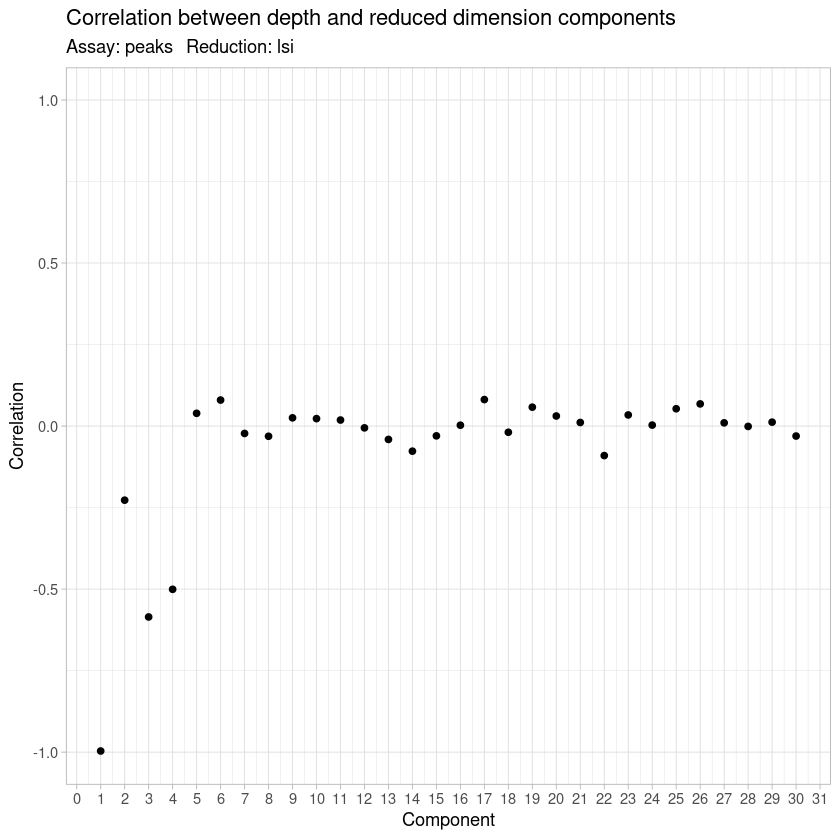

In [62]:
colnames(count.bin) = paste0("cell", 1:ncol(count.bin))
rownames(count.bin) = paste0("peak", 1:nrow(count.bin))
sob = CreateSeuratObject(
    counts = count.bin,
    assay = "peaks"
)
sob <- RunTFIDF(sob)
sob <- FindTopFeatures(sob, min.cutoff = 'q0')
sob <- RunSVD(sob)
DepthCor(sob, n=30)

In [63]:
sob

An object of class Seurat 
5000 features across 1045 samples within 1 assay 
Active assay: peaks (5000 features, 5000 variable features)
 1 dimensional reduction calculated: lsi

09:43:41 UMAP embedding parameters a = 0.9922 b = 1.112

09:43:41 Read 5000 rows and found 26 numeric columns

09:43:41 Using Annoy for neighbor search, n_neighbors = 30

09:43:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:43:44 Writing NN index file to temp file /tmp/RtmpPPCHyF/file7d6c482a22ef

09:43:44 Searching Annoy index using 1 thread, search_k = 3000

09:43:54 Annoy recall = 100%

09:43:56 Commencing smooth kNN distance calibration using 1 thread

09:43:58 Initializing from normalized Laplacian + noise

09:44:00 Commencing optimization for 500 epochs, with 158864 positive edges

09:44:24 Optimization finished

Computing nearest neighbor graph

Computing SNN



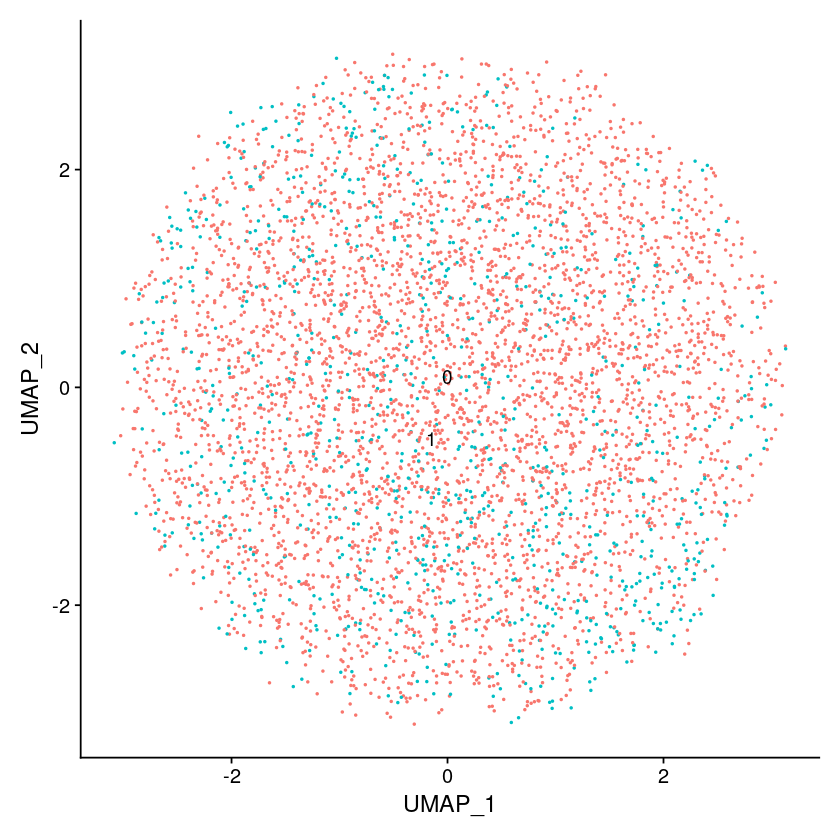

In [61]:
sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
DimPlot(object = sob, label = TRUE) + NoLegend()

In [ ]:
write.table(sob@reductions$lsi@cell.embeddings, file="/home/naoto/scOpen/easiestAA_lsi.tsv", sep="\t")

## 既存データsimulation Cusanovich2018

In [6]:
metadata <- read.table('/home/naoto/scOpen/simATAC/Cusanovich2018_subset/Cusanovich2018_subset_metadata.tsv', header = TRUE)

In [9]:
# Create cell by bin matrix from generated .h5 (snap) file.
c.x.sp = createSnap(
  file="/home/naoto/scOpen/simATAC/Cusanovich2018_subset/Cusanovich2018_subset.snap",
  sample="labels",
  num.cores=1
)

c.x.sp = addBmatToSnap(c.x.sp, bin.size=5000)

# Read true cell labels with cell barcodes list.
metadata <- read.table('/home/naoto/scOpen/simATAC/Cusanovich2018_subset/Cusanovich2018_subset_metadata.tsv', header = TRUE)
label <- sapply(c.x.sp@barcode,
                function(x) as.character(metadata[which(metadata$barcode == x),]$label))
c.x.sp@sample <- unlist(label)

                # Define each cell group.
index1 <- which(c.x.sp@sample == "Lung")
c.x.sp1 <- c.x.sp[index1,]
# c.x.sp1
index2  <- which(c.x.sp@sample == "Thymus")
c.x.sp2 <- c.x.sp[index2,]
# c.x.sp2
index3 <- which(c.x.sp@sample == "Heart")
c.x.sp3 <- c.x.sp[index3,]
# c.x.sp3
index4 <- which(c.x.sp@sample == "Spleen")
c.x.sp4 <- c.x.sp[index4,]
# c.x.sp4
index5 <- which(c.x.sp@sample == "PreFrontalCortex")
c.x.sp5 <- c.x.sp[index5,]
# c.x.sp5
index6 <- which(c.x.sp@sample == "LargeIntestine")
c.x.sp6 <- c.x.sp[index6,]
# c.x.sp6
index7 <- which(c.x.sp@sample == "BoneMarrow")
c.x.sp7 <- c.x.sp[index7,]
# c.x.sp7
index8 <- which(c.x.sp@sample == "Liver")
c.x.sp8 <- c.x.sp[index8,]
# c.x.sp8
index9 <- which(c.x.sp@sample == "Cerebellum")
c.x.sp9 <- c.x.sp[index9,]
# c.x.sp9
index10 <- which(c.x.sp@sample == "SmallIntestine")
c.x.sp10 <- c.x.sp[index10,]
# c.x.sp10
index11 <- which(c.x.sp@sample == "Kidney")
c.x.sp11 <- c.x.sp[index11,]
# c.x.sp11
index12 <- which(c.x.sp@sample == "WholeBrain")
c.x.sp12 <- c.x.sp[index12,]
# c.x.sp12
index13 <- which(c.x.sp@sample == "Testes")
c.x.sp13 <- c.x.sp[index13,]
# c.x.sp13

Epoch: reading the barcode session ...

Epoch: reading cell-bin count matrix session ...



In [11]:
# This function gets a snap object (from SnapATAC package) containing a cell by bin matrix and
# simulates the same number of cells as given in the input, with specified input simulation parameters.
# Inputs:
# my.x.sp: An snap object containing cell by bin matrix in the bmat field.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# species: The species of the input data, to be used for naming the bins in the simulation.
# Output:
# sim: A SingleCellExperiment object containing simulated parametes, returned by simATAC simulator.
#
simulate <- function(my.x.sp, mean, sd, species){
  tic("Estimation time:")
  object <- simATAC::simATACEstimate(t(my.x.sp@bmat))
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/Cusanovich2018/simATAC_estimation_time.txt", append = TRUE)
  write(paste(as.character(nrow(my.x.sp@bmat)),
              simATACget(object, "lib.mean1"),
              simATACget(object, "lib.sd1"),
              simATACget(object, "lib.prob"),
              simATACget(object, "lib.mean2"),
              simATACget(object, "lib.sd2"),
              simATACget(object, "mean.coef0"),
              simATACget(object, "mean.coef1"),
              simATACget(object, "mean.coef2"), sep = "    "), file = "/home/naoto/scOpen/simATAC/Results/Cusanovich2018/simATAC_default_parameters.txt", append = TRUE)
  object <- simATAC::setParameters(object,
                          nCells = nrow(my.x.sp@bmat),
                          species = species,
                          noise.mean = 0,
                          noise.sd = 0)

  tic("Simulation time:")
  sim <- simATAC::simATACSimulate(object)
#   sim.noise = addGaussianNoise(object, sim, mean, sd)
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/Cusanovich2018/simATAC_simulation_time.txt", append = TRUE)

  return(sim)
}

In [12]:

# This function simulates each cell group from Cusanovich2018 separately, and saves all together in
# a .h5 file for performing evaluation.
# Inputs:
# version: An string to put all benchmarking plots and files for this simulation in a folder with
# that name.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# Output: -
#
simulateCusanovich <- function(version, mean, sd){

  # Create a folder for saving simulated count matrix.
  dir.create(paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/", version, sep = ""))
  id = paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/", version, "/Cusanovich2018", sep = "")
  gc()

  # Simulate each cell group with simATAC.
  sim1.1 <- simulate(c.x.sp1,  mean, sd, species="mouse")
  gc()
  sim1.2 <- simulate(c.x.sp2,  mean, sd, species="mouse")
  gc()
  sim1.3 <- simulate(c.x.sp3,  mean, sd, species="mouse")
  gc()
  sim1.4 <- simulate(c.x.sp4,  mean, sd, species="mouse")
  gc()
  sim1.5 <- simulate(c.x.sp5,  mean, sd, species="mouse")
  gc()
  sim1.6 <- simulate(c.x.sp6,  mean, sd, species="mouse")
  gc()
  sim1.7 <- simulate(c.x.sp7,  mean, sd, species="mouse")
  gc()
  sim1.8 <- simulate(c.x.sp8,  mean, sd, species="mouse")
  gc()
  sim1.9 <- simulate(c.x.sp9,  mean, sd, species="mouse")
  gc()
  sim1.10 <- simulate(c.x.sp10,  mean, sd, species="mouse")
  gc()
  sim1.11 <- simulate(c.x.sp11,  mean, sd, species="mouse")
  gc()
  sim1.12 <- simulate(c.x.sp12,  mean, sd, species="mouse")
  gc()
  sim1.13 <- simulate(c.x.sp13,  mean, sd, species="mouse")
  gc()

  # Combine simulated cell groups together to save for further analysis (for performing cell type clustering analysis).
  data <- rbind(t(assays(sim1.1)$counts), t(assays(sim1.2)$counts), t(assays(sim1.3)$counts), t(assays(sim1.4)$counts),
                t(assays(sim1.5)$counts), t(assays(sim1.6)$counts), t(assays(sim1.7)$counts), t(assays(sim1.8)$counts),
                t(assays(sim1.9)$counts), t(assays(sim1.10)$counts), t(assays(sim1.11)$counts), t(assays(sim1.12)$counts),
                t(assays(sim1.13)$counts))
  data <- as(data, "dgCMatrix")
  label <- unlist(c(c.x.sp1@sample, c.x.sp2@sample, c.x.sp3@sample, c.x.sp4@sample,
                    c.x.sp5@sample, c.x.sp6@sample, c.x.sp7@sample, c.x.sp8@sample,
                    c.x.sp9@sample, c.x.sp10@sample, c.x.sp11@sample, c.x.sp12@sample,
                    c.x.sp13@sample))
  gc()

  # Save simulated matrix with labels in a h5 file.

  if (file.exists(paste(id, "_sim_mat.h5", sep="")))
    #Delete file if it exists
    file.remove(paste(id, "_sim_mat.h5", sep=""))

  mat <- summary(data)
  h5createFile(paste(id, "_sim_mat.h5", sep=""))
  h5write(mat, paste(id, "_sim_mat.h5", sep=""), "sim")
  h5write(label, paste(id, "_sim_mat.h5", sep=""), "label")
  return(list(id, mat))
}

In [13]:
ls = simulateCusanovich("v1.0", 0, 0)
id = ls[[1]]
mat = ls[[2]]

Warning message in dir.create(paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/", :
"'/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0' already exists"
simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 74.136 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 93 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 50.764 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 69.333 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 49.199 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 69.266 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 23.83 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 41.64 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 40.247 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 56.181 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 47.513 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 65.453 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 58.612 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 74.957 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 39.523 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 58.351 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 12.567 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 27.674 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 25.649 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 41.813 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 38.985 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 59.977 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 63.928 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 79.086 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 16.152 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

mouse referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 31.712 sec elapsed


In [14]:
mat

i,j,x
<int>,<int>,<dbl>
2920,1,1
3567,1,1
4221,1,1
4424,1,1
5166,1,1
5631,1,1
6340,1,1
7863,1,1
8375,1,1


In [15]:
# adding Gaussian noise and save
mean=-1.0
sd = 1.0
mat$noise = round(mat$x + rnorm(n=dim(mat)[1], mean = mean, sd = sd))
h5write(mat, paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [14]:
data.label = h5read("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/Cusanovich2018_sim_mat.h5", "label")
data.sim = h5read("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/Cusanovich2018_-1_1_sim_mat.h5", "sim")
# data.sim = h5read(paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [16]:
means = c(-1.0)#, -2.0, -3.0)
for (mean in means) {
    sd = -1 * mean
    print(sd)
    print(mean)
    for (i in 1:5) {
        cols = colnames(data.sim)
        data.sim$noise.new = round(data.sim$x + rnorm(n=dim(data.sim)[1], mean = mean, sd = sd))
        colnames(data.sim) = append(cols, paste("noise_", mean, "_", sd, "_", i, sep=""))
    }
}

[1] 1
[1] -1


In [17]:
cols = colnames(data.sim)
for (label in cols[5:length(cols)]) {
    print(label)
    data.sim.sub = data.sim %>% select("i","j", "x", label)
    colnames(data.sim.sub) = c("i", "j", "x", "noise")
    data.drop = data.sim %>% filter(noise > 0)
    print(dim(data.drop))
    
    count.sim = sparseMatrix(i=as.vector(data.sim.sub$i), j=as.vector(data.sim.sub$j), x=as.vector(data.sim.sub$x))
    count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
#     dim(count.sim)
#     dim(count.sim.noise)
    counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
    count.sim.peak = counts.peak[[1]]
    count.sim.noise.peak = counts.peak[[2]]
    count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
    count.sim.bin = getBinByCell(count.sim.peak)
#     print(dim(count.sim.bin))
#     print(dim(count.sim.noise.bin))
    write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/count_sim_bin_table_", label,".tsv", sep=""), sep="\t")
    write.table(summary(count.sim.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/count_sim_bin_table_no_", label, ".tsv", sep=""), sep="\t")

#     colnames(count.sim) = paste0("cell", 1:ncol(count.sim))
#     rownames(count.sim) = paste0("peak", 1:nrow(count.sim))
#     sob = CreateSeuratObject(
#         counts = count.sim,
#         assay = "peaks"
#     )
#     sob <- RunTFIDF(sob)
#     sob <- FindTopFeatures(sob, min.cutoff = 'q0')
#     sob <- RunSVD(sob)
#     DepthCor(sob, n=30)
#     sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
#     DimPlot(object = sob, label = TRUE) + NoLegend()
#     path_lsi = paste("/home/naoto/scOpen/Results/Buenrostro2018/v1.0/count_sim_bin_lsi", label, ".tsv", sep="")
#     write.table(sob@reductions$lsi@cell.embeddings, file=path_lsi, sep="\t")
#     break

}

[1] "noise_-1_1_1"
[1] 56565789        9
[1] "noise_-1_1_2"
[1] 56565789        9
[1] "noise_-1_1_3"
[1] 56565789        9
[1] "noise_-1_1_4"
[1] 56565789        9
[1] "noise_-1_1_5"
[1] 56565789        9


In [15]:
head(data.label)
head(data.sim)

[1] "Lung" "Lung" "Lung" "Lung" "Lung" "Lung"

,i,j,x,noise
,<int>,<int>,<dbl>,<dbl>
1,2920,1,1,-2
2,3567,1,1,-1
3,4221,1,1,-1
4,4424,1,1,1
5,5166,1,1,-1
6,5631,1,1,1


In [18]:
data.drop = data.sim %>% filter(noise > 0)
head(data.drop)

,i,j,x,noise
,<int>,<int>,<dbl>,<dbl>
1,4424,1,1,1
2,5631,1,1,1
3,8375,1,1,1
4,10819,1,1,1
5,11446,1,1,1
6,2970,2,1,1


In [19]:
count.sim = sparseMatrix(i=as.vector(data.sim$i), j=as.vector(data.sim$j), x=as.vector(data.sim$x))
count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
dim(count.sim)
dim(count.sim.noise)
counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
count.sim.peak = counts.peak[[1]]
count.sim.noise.peak = counts.peak[[2]]
count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
count.sim.bin = getBinByCell(count.sim.peak)
dim(count.sim.bin)
dim(count.sim.noise.bin)
write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/count_sim_noise_bin_table_", mean, "_", sd ,".tsv"), sep="\t")
write.table(summary(count.sim.bin), file="/home/naoto/scOpen/simATAC/Results/Cusanovich2018/v1.0/count_sim_bin_table.tsv", sep="\t")

[1]  12178 545170

[1]  12178 545170

[1]  5000 12178

[1]  5000 12178

### PBMCs

In [21]:
##PBMCs benchmarking###########################################################################################################

# Create cell by bin matrix from generated .h5 (snap) file
p.x.sp = createSnap(
  file="/home/naoto/scOpen/simATAC/PBMCs/PBMCs.snap",
  sample="labels",
  num.cores=1
)
p.x.sp = addBmatToSnap(p.x.sp, bin.size=5000)

# Read true cell labels with cell barcodes list
metadata <- read.table('/home/naoto/scOpen/simATAC/PBMCs/PBMCs_metadata.tsv', header = TRUE)
metadata$barcode <- substring(metadata$barcode, first = 1, last = 16)
label <- sapply(p.x.sp@barcode,
                function(x) as.character(metadata[which(metadata$barcode == x),]$label))
p.x.sp@sample <- unlist(label)

# Define each cell group
index1 <- which(p.x.sp@sample == "1")
p.x.sp1 <- p.x.sp[index1 ,]
# p.x.sp1
index2  <- which(p.x.sp@sample == "2")
p.x.sp2 <- p.x.sp[index2,]
# p.x.sp2
index3 <- which(p.x.sp@sample == "3")
p.x.sp3 <- p.x.sp[index3,]
# p.x.sp3
index4 <- which(p.x.sp@sample == "4")
p.x.sp4 <- p.x.sp[index4,]
# p.x.sp4
index5 <- which(p.x.sp@sample == "5")
p.x.sp5 <- p.x.sp[index5,]
# p.x.sp5
index6 <- which(p.x.sp@sample == "6")
p.x.sp6 <- p.x.sp[index6,]
# p.x.sp6
index7 <- which(p.x.sp@sample == "7")
p.x.sp7 <- p.x.sp[index7,]
# p.x.sp7
index8 <- which(p.x.sp@sample == "8")
p.x.sp8 <- p.x.sp[index8,]
# p.x.sp8

Epoch: reading the barcode session ...

Epoch: reading cell-bin count matrix session ...



In [22]:
library(tictoc)


# This function gets a snap object (from SnapATAC package) containing a cell by bin matrix and
# simulates the same number of cells as given in the input, with specified input simulation parameters.
# Inputs:
# my.x.sp: An snap object containing cell by bin matrix in the bmat field.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# species: The species of the input data, to be used for naming the bins in the simulation.
# Output:
# sim: A SingleCellExperiment object containing simulated parametes, returned by simATAC simulator.
#
simulate <- function(my.x.sp, mean, sd, species){
  tic("Estimation time:")
  object <- simATAC::simATACEstimate(t(my.x.sp@bmat))
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/PBMCs/simATAC_estimation_time.txt", append = TRUE)
  write(paste(as.character(nrow(my.x.sp@bmat)),
              simATACget(object, "lib.mean1"),
              simATACget(object, "lib.sd1"),
              simATACget(object, "lib.prob"),
              simATACget(object, "lib.mean2"),
              simATACget(object, "lib.sd2"),
              simATACget(object, "mean.coef0"),
              simATACget(object, "mean.coef1"),
              simATACget(object, "mean.coef2"), sep = "    "), file = "/home/naoto/scOpen/simATAC/Results/PBMCs/simATAC_default_parameters.txt", append = TRUE)
  object <- simATAC::setParameters(object,
                          nCells = nrow(my.x.sp@bmat),
                          species = species,
                          noise.mean = 0,
                          noise.sd = 0)

  tic("Simulation time:")
  sim <- simATAC::simATACSimulate(object)
#   sim.noise = addGaussianNoise(object, sim, mean, sd)
  x <- toc()
  write(paste(as.character(nrow(my.x.sp@bmat)), x$toc-x$tic, sep = "     "), file = "/home/naoto/scOpen/simATAC/Results/PBMCs/simATAC_simulation_time.txt", append = TRUE)

  return(sim)
}

In [26]:

# This function simulates each cell group from PBMCs separately, and saves all together in
# a .h5 file for performing evaluation.
# Inputs:
# version: An string to put all benchmarking plots and files for this simulation in a folder with
# that name.
# mean: The Gaussian noise mean to be used for simATAC simulation.
# sd: The Gaussian noise standard deviation to be used for simATAC simulation.
# Output: -
#
simulatePBMC <- function(version,  mean, sd){

  # Create a folder for saving simulated count matrix.
  dir.create(paste("/home/naoto/scOpen/simATAC/Results/PBMCs/", version, sep = ""))
  id = paste("/home/naoto/scOpen/simATAC/Results/PBMCs/", version, "/PBMCs", sep = "")
  gc()

  # Simulate each cell group with simATAC.
  sim2.1 <- simulate(p.x.sp1,  mean, sd, species = "human")
  gc()
  sim2.2 <- simulate(p.x.sp2,  mean, sd, species = "human")
  gc()
  sim2.3 <- simulate(p.x.sp3,  mean, sd, species = "human")
  gc()
  sim2.4 <- simulate(p.x.sp4,  mean, sd, species = "human")
  gc()
  sim2.5 <- simulate(p.x.sp5,  mean, sd, species = "human")
  gc()
  sim2.6 <- simulate(p.x.sp6,  mean, sd, species = "human")
  gc()
  sim2.7 <- simulate(p.x.sp7,  mean, sd, species = "human")
  gc()
  sim2.8 <- simulate(p.x.sp8,  mean, sd, species = "human")
  gc()

  # Combine simulated cell groups together to save for further analysis (for performing cell type clustering analysis).
  data <- rbind(t(assays(sim2.1)$counts), t(assays(sim2.2)$counts), t(assays(sim2.3)$counts), t(assays(sim2.4)$counts),
                t(assays(sim2.5)$counts), t(assays(sim2.6)$counts), t(assays(sim2.7)$counts), t(assays(sim2.8)$counts))
  data <- as(data, "dgCMatrix")
  label <- unlist(c(p.x.sp1@sample, p.x.sp2@sample, p.x.sp3@sample, p.x.sp4@sample,
                    p.x.sp5@sample, p.x.sp6@sample, p.x.sp7@sample, p.x.sp8@sample))
  gc()

  # Save simulated matrix with labels in a h5 file.

  if (file.exists(paste(id, "_sim_mat.h5", sep="")))
    #Delete file if it exists
    file.remove(paste(id, "_sim_mat.h5", sep=""))

  mat <- summary(data)
  h5createFile(paste(id, "_sim_mat.h5", sep=""))
  h5write(mat, paste(id, "_sim_mat.h5", sep=""), "sim")
  h5write(label, paste(id, "_sim_mat.h5", sep=""), "label")
  return(list(id, mat))
}

In [27]:
ls = simulatePBMC("v1.0", 0, 0)
id = ls[[1]]
mat = ls[[2]]

Warning message in dir.create(paste("/home/naoto/scOpen/simATAC/Results/PBMCs/", :
"'/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0' already exists"
simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 54.663 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 74.064 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 51.287 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 72.886 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 51.653 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 72.384 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 44.48 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 65.435 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 35.908 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 52.431 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 32.304 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 51.193 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 19.087 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 35.784 sec elapsed


simATAC is:

...estimating library size...

...estimating non-zero cell proportion...

...estimating bin mean...



Estimation time:: 4.996 sec elapsed


simATAC is:

...updating parameters...

...setting up SingleCellExperiment object...

human referene is not supported by current version of simATAC. simATAC supports hg19, hg38, mm9, and mm10 references. Please give a file of bin information consistent with your input data with three columns and header of "chr start end" as the bin.coordinate.file parameter. If you don't have a file containing the information of bins, simATAC considers the bin.coordinate.file parameter as "None". In this case, you will not be able to get the coordinate information of bins. Please make sure the "species" parameter of the simATACCount object is set correctly.

...simulating library size...

...simulating non-zero cell proportion...

...simulating bin mean...

...generating final counts...

...Done...



Simulation time:: 20.413 sec elapsed


In [28]:
paste(id, "_sim_mat.h5", sep="")

[1] "/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/PBMCs_sim_mat.h5"

In [29]:
mat

i,j,x
<int>,<int>,<dbl>
379,1,1
432,1,1
572,1,1
706,1,1
1733,1,1
2065,1,1
2532,1,1
2768,1,1
2775,1,1


In [30]:
# adding Gaussian noise and save
mean=-1.0
sd = 1.0
mat$noise = round(mat$x + rnorm(n=dim(mat)[1], mean = mean, sd = sd))
h5write(mat, paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [18]:
data.label = h5read("/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/PBMCs_sim_mat.h5", "label")
data.sim = h5read("/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/PBMCs_-1_1_sim_mat.h5", "sim")
# data.sim = h5read(paste(id, "_", mean, "_", sd, "_sim_mat.h5", sep=""), "sim")

In [19]:
means = c(-1.0)#, -2.0, -3.0)
for (mean in means) {
    sd = -1 * mean
    print(sd)
    print(mean)
    for (i in 1:5) {
        cols = colnames(data.sim)
        data.sim$noise.new = round(data.sim$x + rnorm(n=dim(data.sim)[1], mean = mean, sd = sd))
        colnames(data.sim) = append(cols, paste("noise_", mean, "_", sd, "_", i, sep=""))
    }
}
cols = colnames(data.sim)
for (label in cols[5:length(cols)]) {
    print(label)
    data.sim.sub = data.sim %>% select("i","j", "x", label)
    colnames(data.sim.sub) = c("i", "j", "x", "noise")
    data.drop = data.sim %>% filter(noise > 0)
    print(dim(data.drop))
    
    count.sim = sparseMatrix(i=as.vector(data.sim.sub$i), j=as.vector(data.sim.sub$j), x=as.vector(data.sim.sub$x))
    count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
#     dim(count.sim)
#     dim(count.sim.noise)
    counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
    count.sim.peak = counts.peak[[1]]
    count.sim.noise.peak = counts.peak[[2]]
    count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
    count.sim.bin = getBinByCell(count.sim.peak)
#     print(dim(count.sim.bin))
#     print(dim(count.sim.noise.bin))
    write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/count_sim_bin_table_", label,".tsv", sep=""), sep="\t")
    write.table(summary(count.sim.bin), file=paste("/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/count_sim_bin_table_no_", label, ".tsv", sep=""), sep="\t")

#     colnames(count.sim) = paste0("cell", 1:ncol(count.sim))
#     rownames(count.sim) = paste0("peak", 1:nrow(count.sim))
#     sob = CreateSeuratObject(
#         counts = count.sim,
#         assay = "peaks"
#     )
#     sob <- RunTFIDF(sob)
#     sob <- FindTopFeatures(sob, min.cutoff = 'q0')
#     sob <- RunSVD(sob)
#     DepthCor(sob, n=30)
#     sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
#     sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
#     DimPlot(object = sob, label = TRUE) + NoLegend()
#     path_lsi = paste("/home/naoto/scOpen/Results/Buenrostro2018/v1.0/count_sim_bin_lsi", label, ".tsv", sep="")
#     write.table(sob@reductions$lsi@cell.embeddings, file=path_lsi, sep="\t")
#     break

}

[1] 1
[1] -1
[1] "noise_-1_1_1"
[1] 26560715        9
[1] "noise_-1_1_2"
[1] 26560715        9
[1] "noise_-1_1_3"
[1] 26560715        9
[1] "noise_-1_1_4"
[1] 26560715        9
[1] "noise_-1_1_5"
[1] 26560715        9


In [32]:
head(data.label)
head(data.sim)
data.drop = data.sim %>% filter(noise > 0)
head(data.drop)

[1] "1" "1" "1" "1" "1" "1"

,i,j,x,noise
,<int>,<int>,<dbl>,<dbl>
1,379,1,1,1
2,432,1,1,-1
3,572,1,1,-1
4,706,1,1,0
5,1733,1,1,0
6,2065,1,1,1


,i,j,x,noise
,<int>,<int>,<dbl>,<dbl>
1,379,1,1,1
2,2065,1,1,1
3,2768,1,1,1
4,2775,1,1,2
5,2841,1,1,1
6,5257,1,1,1


In [33]:
count.sim = sparseMatrix(i=as.vector(data.sim$i), j=as.vector(data.sim$j), x=as.vector(data.sim$x))
count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
dim(count.sim)
dim(count.sim.noise)
counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
count.sim.peak = counts.peak[[1]]
count.sim.noise.peak = counts.peak[[2]]
count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
count.sim.bin = getBinByCell(count.sim.peak)
dim(count.sim.bin)
dim(count.sim.noise.bin)
write.table(summary(count.sim.noise.bin), file=paste("/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/count_sim_noise_bin_table_", mean, "_", sd ,".tsv"), sep="\t")
write.table(summary(count.sim.bin), file="/home/naoto/scOpen/simATAC/Results/PBMCs/v1.0/count_sim_bin_table.tsv", sep="\t")

[1]   5335 627478

[1]   5335 627478

[1] 5000 5335

[1] 5000 5335

## 類似度行列の計算

In [37]:
data.drop = data.sim %>% filter(noise > 0)

In [38]:
name = "Cusanovich2018"
data.label = h5read(paste("/home/naoto/scOpen/simATAC/Results/", name, "/v1.0/", name, "_sim_mat.h5", sep=""), "label")
data.sim = h5read(paste("/home/naoto/scOpen/simATAC/Results/", name, "/v1.0/", name, "_-1_1_sim_mat.h5", sep=""), "sim")
data.drop = data.sim %>% filter(noise > 0)

count.sim = sparseMatrix(i=as.vector(data.sim$i), j=as.vector(data.sim$j), x=as.vector(data.sim$x))
count.sim.noise = sparseMatrix(i=as.vector(data.drop$i), j=as.vector(data.drop$j), x=as.vector(data.drop$noise))
dim(count.sim)
dim(count.sim.noise)
counts.peak = getPeakByCell(t(count.sim),t(count.sim.noise))
count.sim.peak = counts.peak[[1]]
count.sim.noise.peak = counts.peak[[2]]
count.sim.noise.bin = getBinByCell(count.sim.noise.peak)
count.sim.bin = getBinByCell(count.sim.peak)
dim(count.sim.bin)
dim(count.sim.noise.bin)

[1]  12178 545170

[1]  12178 545170

[1]  5000 12178

[1]  5000 12178

In [54]:
sob

An object of class Seurat 
12178 features across 5000 samples within 1 assay 
Active assay: peaks (12178 features, 12178 variable features)
 2 dimensional reductions calculated: lsi, umap

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



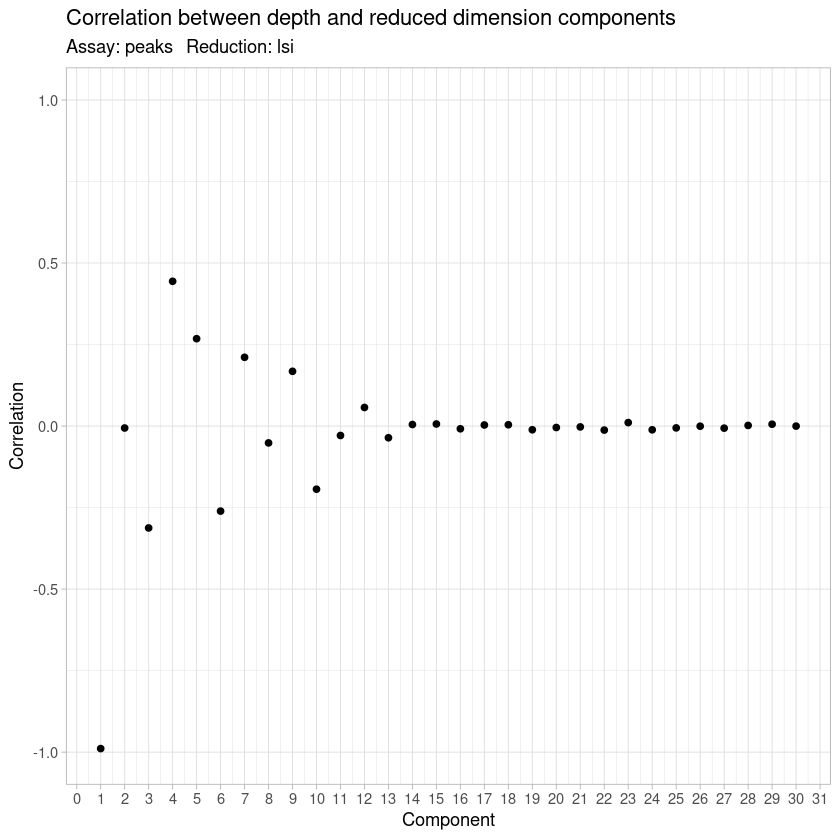

In [55]:
colnames(count.sim.bin) = paste0("cell", 1:ncol(count.sim.bin))
rownames(count.sim.bin) = paste0("peak", 1:nrow(count.sim.bin))
sob = CreateSeuratObject(
    counts = count.sim.bin,
    assay = "peaks"
)
sob <- RunTFIDF(sob)
sob <- FindTopFeatures(sob, min.cutoff = 'q0')
sob <- RunSVD(sob)
DepthCor(sob, n=30)

In [56]:
dims = c(2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30)

17:48:17 UMAP embedding parameters a = 0.9922 b = 1.112

17:48:17 Read 12178 rows and found 30 numeric columns

17:48:17 Using Annoy for neighbor search, n_neighbors = 30

17:48:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:48:24 Writing NN index file to temp file /tmp/Rtmpc55T7i/file5f4e5c7fb533

17:48:24 Searching Annoy index using 1 thread, search_k = 3000

17:48:48 Annoy recall = 100%

17:48:51 Commencing smooth kNN distance calibration using 1 thread

17:48:54 Initializing from normalized Laplacian + noise

17:49:00 Commencing optimization for 200 epochs, with 470676 positive edges

17:49:24 Optimization finished

Computing nearest neighbor graph

Computing SNN



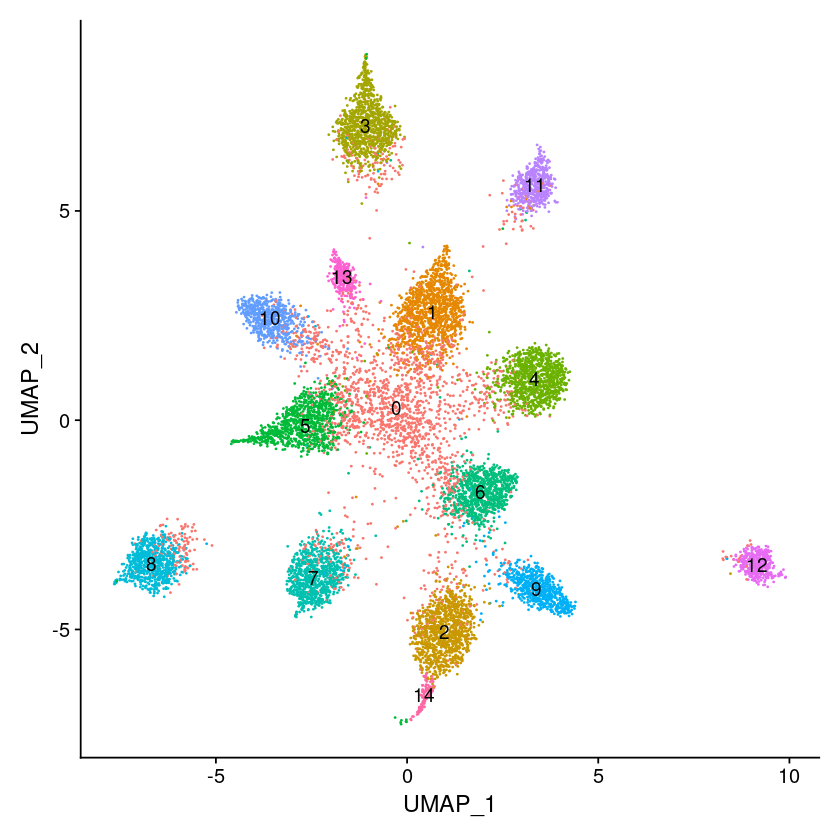

In [57]:
sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 1:30)
sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 1:30)
sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
DimPlot(object = sob, label = TRUE) + NoLegend()

In [58]:
# 前処理後のLSIの各componentの値を保存(LSI0~LSI49)
write.table(sob@reductions$lsi@cell.embeddings, file=paste("/home/naoto/scOpen/simATAC/Results/", name, "/v1.0/count_sim_bin_lsi.tsv", sep=""), sep="\t")